# Python for Harvesting Data on the Web

**Nicholas Wolf and Vicky Steeves, NYU Data Services**

Vicky's ORCID: 0000-0003-4298-168X | Nick's ORCID: 0000-0001-5512-6151

This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License.

## Overview

This session is an intermediate-to-advanced level class that offers some ideas for how to approach the following common data wrangling needs in research:

 - Obtain data and load it into a suitable data "container" for analysis, often via a web interface, especially an API
 - Parse the data retrieved via an API and turn it into a useful object for manipulation and analysis
 - Perform some basic data integrity checks of the downloaded data in anticipation of preparing it for analysis

## Setup

**Project Environment**

Download the notebook available at [https://goo.gl/Pnm7Dx](https://goo.gl/Pnm7Dx) and open it in Jupyter Notebook. Alternatively, you can clone the course materials using

<code>git clone https://github.com/NYU-DataServices/DataHarvesting-Python.git</code>

**State of New York Socrata API Account**

To work with this session's data, you'll need to create an API account with the state of New York's data service. Visit <a href="https://data.ny.gov">data.ny.gov</a> and click on signup to create an account.

**Google Sheets API**

To demonstrate how to work with oauth API interfaces, we'll do some sandbox work using Google Sheets API as a proof of concept. For this, you'll need a Google Drive account such as the one associated with your NYU email address.


# 1. Web Requests

It is not unusual to find open data served directly on the web, without requiring any tokens or authorizations. Although it is not often the practice to provide very large resources via such an entrypoint because of the burden it places on data servers, smaller datasets are frequently available. When it comes to such non-API generated data it is generally easier to work with services that serve the data directly in its native file format, rather than wrapping it in HTML. The latter requires you to parse first the HTML or interpret the HTTP response.

As an example, take the motor vehicle accident report <a href="https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Vehicle-Information-Three-Ye/xe9x-a24f">data found here</a>. One thousand records from this 1.65 million-record dataset can be accessed directly at <a href="https://data.ny.gov/resource/cm56-widp.json">https://data.ny.gov/resource/cm56-widp.json</a> (FYI Firefox has a nice JSON viewer built in when you encounter .json hosted files on the web.)

Let's walk through making an HTTP request for that .json data and quickly transforming it into a useful container (a Pandas dataframe) to ready it for use. We'll make use of Python's <a href="https://docs.python.org/3/library/json.html">JSON module</a>, a compact and easy-to-use way of turning JSON into Python's native object types, lists and dictionaries. If you want to anticipate what JSON input will prompt which Python object type output, see this table here: https://docs.python.org/3/library/json.html#json-to-py-table. Note that a JSON array of key-value objects will yield a Python list of dictionaries.


In [2]:
import json
import requests

mv_data_json = requests.get('https://data.ny.gov/resource/xe9x-a24f.json')

mv_list_recs = json.loads(mv_data_json.text)

print(mv_list_recs[0])

{'year': '2016', 'case_vehicle_id': '13364180', 'vehicle_body_type': 'SUBURBAN', 'registration_class': 'PASSENGER OR SUBURBAN', 'action_prior_to_accident': 'Going Straight Ahead', 'type_axles_of_truck_or_bus': 'Not Entered', 'direction_of_travel': 'East', 'fuel_type': 'Gas', 'vehicle_year': '2015', 'state_of_registration': 'NY', 'number_of_occupants': '2', 'engine_cylinders': '4', 'vehicle_make': 'NISSA', 'contributing_factor_1': 'HUMAN', 'contributing_factor_1_description': 'Fell Asleep', 'contributing_factor_2': 'HUMAN', 'contributing_factor_2_description': 'Unknown', 'event_type': 'Not Applicable', 'partial_vin': 'KNMAT2MV1FP544486'}


**Pandas**

If you haven't yet given a Pandas dataframe a try as a way to manage large arrays of information, give it a go. It <em>is</em> possible to go overboard: not everything needs to be put in a dataframe, especially when a Python list of lists or a dictionary will do. Take a look at how fast we can access subsets of the motor vehicle data.

In [3]:
import pandas as pd

mv_df = pd.DataFrame(mv_list_recs)

mv_df.head(10)

,action_prior_to_accident,case_vehicle_id,contributing_factor_1,contributing_factor_1_description,contributing_factor_2,contributing_factor_2_description,direction_of_travel,engine_cylinders,event_type,fuel_type,number_of_occupants,partial_vin,registration_class,state_of_registration,type_axles_of_truck_or_bus,vehicle_body_type,vehicle_make,vehicle_year,year
0,Going Straight Ahead,13364180,HUMAN,Fell Asleep,HUMAN,Unknown,East,4,Not Applicable,Gas,2,KNMAT2MV1FP544486,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,NISSA,2015,2016
1,Merging,13364181,HUMAN,Alcohol Involvement,HUMAN,Not Applicable,South,4,Not Entered,Gas,1,5NPET46C87H227617,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,HYUND,2007,2016
2,Going Straight Ahead,13364182,HUMAN,Not Applicable,HUMAN,Not Applicable,South,4,Not Entered,Gas,1,1HGCP26379A133398,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,HONDA,2009,2016
3,Going Straight Ahead,13364283,ENVMT,Pavement Slippery,HUMAN,Not Applicable,North,4,Not Applicable,Gas,1,1B3HB28B37D582730,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,DODGE,2007,2016
4,Changing Lanes,13364291,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,West,4,Not Applicable,Gas,1,WMWZC3C57CWL81108,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,MINI,2012,2016
5,Going Straight Ahead,13364292,HUMAN,Not Applicable,HUMAN,Not Applicable,West,5,Not Applicable,Gas,3,3VWDP7AJ0DM381569,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,VOLKS,2013,2016
6,Going Straight Ahead,13364304,ENVMT,Pavement Slippery,HUMAN,Not Applicable,East,6,Not Applicable,Gas,2,3GCUKREH8EG196335,PASSENGER OR SUBURBAN,NY,Not Entered,PICKUP TRUCK,CHEVR,2014,2016
7,Going Straight Ahead,13364305,ENVMT,Pavement Slippery,HUMAN,Not Applicable,North,4,Not Applicable,Gas,1,1HGCM56387A220086,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,HONDA,2007,2016
8,Going Straight Ahead,13364306,ENVMT,Pavement Slippery,HUMAN,Not Applicable,North,6,"Snow Embankment, Collision With Fixed Object",Gas,1,3G5DA03E04S597761,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,BUICK,2004,2016
9,Going Straight Ahead,13364307,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,North,4,Unknown,Gas,4,2CNFLCEC1B6362978,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,CHEVR,2011,2016


** Bonus: wget direct from web**

If you have wget installed on your system, you can use the command line utility wget directly in a Notebook cell. This cell could then be run at the start of your notebook to always retrieve the latest version of a dataset.

To install wget, visit [http://www.gnu.org/software/wget/](http://www.gnu.org/software/wget/)

In [1]:
!wget https://data.ny.gov/resource/xe9x-a24f.json

--2020-03-03 09:34:06--  https://data.ny.gov/resource/xe9x-a24f.json
Resolving data.ny.gov (data.ny.gov)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.ny.gov (data.ny.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘xe9x-a24f.json’

xe9x-a24f.json          [ <=>                ] 606.07K  --.-KB/s    in 0.09s   

2020-03-03 09:34:08 (6.51 MB/s) - ‘xe9x-a24f.json’ saved [620616]



In [4]:
wget_json = json.loads(open('xe9x-a24f.json').read())
wget_json[0]

{'year': '2016',
 'case_vehicle_id': '13364180',
 'vehicle_body_type': 'SUBURBAN',
 'registration_class': 'PASSENGER OR SUBURBAN',
 'action_prior_to_accident': 'Going Straight Ahead',
 'type_axles_of_truck_or_bus': 'Not Entered',
 'direction_of_travel': 'East',
 'fuel_type': 'Gas',
 'vehicle_year': '2015',
 'state_of_registration': 'NY',
 'number_of_occupants': '2',
 'engine_cylinders': '4',
 'vehicle_make': 'NISSA',
 'contributing_factor_1': 'HUMAN',
 'contributing_factor_1_description': 'Fell Asleep',
 'contributing_factor_2': 'HUMAN',
 'contributing_factor_2_description': 'Unknown',
 'event_type': 'Not Applicable',
 'partial_vin': 'KNMAT2MV1FP544486'}

# 2. Simple Web API Requests

For more robust ways of serving up data, i.e. by APIs, we generally need to register an "app," i.e. an application that will be accessing the data, receive at the very least a token (and often a client secret as well) to enable tracked downloads of data, ensure proper access limits, etc.

We can think of these access points as involving one of two levels of authentication: a simple authentication involving signed requests (where a long term token is passed along with the request but no secondary per-request or limited-time token is needed), and a more complex, two or three step authentication process.

### Simple Authentication Example Using NYC State Data Socrata

It is very helpful if an API comes with a pre-built library to interface with that server so that you don't have to handle signing requests in HTTP, managing tokens, etc. 

Fortunately, we have a nice workable pre-made library for working with this same NY State Socrata API portal. The module is called <a href="https://github.com/xmunoz/sodapy/blob/master/examples/basic_queries.py"><pre>sodapy</pre></a>

We'll need to install it:

<pre>pip install sodapy</pre>

or

<pre>easy_install sodapy</pre>

**Setting Up Your App on Your Socrata Account**

Once you have sodapy installed, you'll want to visit the API section of the website, which has its own record of the same dataset we visited above with some additional access information:

[https://dev.socrata.com/foundry/data.ny.gov/xe9x-a24f](https://dev.socrata.com/foundry/data.ny.gov/xe9x-a24f)

If you scroll down about halfway through this page, you'll see a large "Sign up for an app token!" button. Click on that to be taken to your API dashboard (alternative, you can login and navigae to https://data.ny.gov/profile/edit/developer_settings)

In the second main section, select "Create New App Token."

Fill in some basic details for your "app" and once generated, copy down the App Token given to you.

We can now proceed to try out the sodapy library.

In [8]:
import sodapy
from sodapy import Socrata

client = Socrata('data.ny.gov','TOKEN',
                username='EMAIL-USERNAME',
                password='PASSWORD')

results = client.get('xe9x-a24f', limit=2000)

In [6]:
results_df = pd.DataFrame.from_records(results)
display(results_df.head(10))

,action_prior_to_accident,case_vehicle_id,contributing_factor_1,contributing_factor_1_description,contributing_factor_2,contributing_factor_2_description,direction_of_travel,engine_cylinders,event_type,fuel_type,number_of_occupants,partial_vin,registration_class,state_of_registration,type_axles_of_truck_or_bus,vehicle_body_type,vehicle_make,vehicle_year,year
0,Going Straight Ahead,13364180,HUMAN,Fell Asleep,HUMAN,Unknown,East,4,Not Applicable,Gas,2,KNMAT2MV1FP544486,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,NISSA,2015,2016
1,Merging,13364181,HUMAN,Alcohol Involvement,HUMAN,Not Applicable,South,4,Not Entered,Gas,1,5NPET46C87H227617,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,HYUND,2007,2016
2,Going Straight Ahead,13364182,HUMAN,Not Applicable,HUMAN,Not Applicable,South,4,Not Entered,Gas,1,1HGCP26379A133398,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,HONDA,2009,2016
3,Going Straight Ahead,13364283,ENVMT,Pavement Slippery,HUMAN,Not Applicable,North,4,Not Applicable,Gas,1,1B3HB28B37D582730,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,DODGE,2007,2016
4,Changing Lanes,13364291,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,West,4,Not Applicable,Gas,1,WMWZC3C57CWL81108,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,MINI,2012,2016
5,Going Straight Ahead,13364292,HUMAN,Not Applicable,HUMAN,Not Applicable,West,5,Not Applicable,Gas,3,3VWDP7AJ0DM381569,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,VOLKS,2013,2016
6,Going Straight Ahead,13364304,ENVMT,Pavement Slippery,HUMAN,Not Applicable,East,6,Not Applicable,Gas,2,3GCUKREH8EG196335,PASSENGER OR SUBURBAN,NY,Not Entered,PICKUP TRUCK,CHEVR,2014,2016
7,Going Straight Ahead,13364305,ENVMT,Pavement Slippery,HUMAN,Not Applicable,North,4,Not Applicable,Gas,1,1HGCM56387A220086,PASSENGER OR SUBURBAN,NY,Not Entered,4 DOOR SEDAN,HONDA,2007,2016
8,Going Straight Ahead,13364306,ENVMT,Pavement Slippery,HUMAN,Not Applicable,North,6,"Snow Embankment, Collision With Fixed Object",Gas,1,3G5DA03E04S597761,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,BUICK,2004,2016
9,Going Straight Ahead,13364307,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,North,4,Unknown,Gas,4,2CNFLCEC1B6362978,PASSENGER OR SUBURBAN,NY,Not Entered,SUBURBAN,CHEVR,2011,2016


### Paging

In our example above, using sodapy, notice that we can set the number of results we obtain for each request. This is helpful, even if we want the full set of data. At 1.6 million records, this dataset is taxing (though not extraordinarly so) on our http connection to grab it in one go.

A common approach used by data providers to solving this problem is paging. In this setup, you are limited in the number of results you can obtain in each request (often set at 200 records) and must make multiple requests and compile the results.

Take, for example, the city of New York's [https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9](311 calls data). At over 22.4 million records, it isn't realistic to pull the entire dataset in one go. You must page results by passing a "limit" and "offset" paramters in your request URL. Think of this as the total number of records (limit) and a way to request subsequent subsets of results (first page, second page, third page; or offset 0, 1, 2...). An example is available here: [https://dev.socrata.com/docs/paging.html](https://dev.socrata.com/docs/paging.html).

# 3. Complex Web API Requests

In other cases our data providers will want you to perform a a two or three-legged authorization -- in other words, you register an access token that you use to sign a request for a second token which you can then pass in the actual data request, PLUS some kind of password authorization that is passed via a web form.

To illustrate how this works on a nice localized environment, we'll practice this using our own Google Drive accounts and Google Sheets (which also happen to be a nice way to read/write out data).

We'll more or less follow Google's own tutorial pitched to Python approaches available here: https://developers.google.com/sheets/api/quickstart/python

A prerequesite is yet another helpful wrapper, this one for working with Google's APIs:

<pre>pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib</pre>


### 1. Enable the GSheets API on your account

Login on your browser and click on the "Enable the Google Sheets API" button in the tutorial linked above. Select Download Client Configuration and save the credentials.json file to the same directory as this notebook.

### 2.  Create a Sample Sheet in Google Drive

You can name the sheet or not, but it would be helpful to have some dummy data on the sheet to access. For example, consider copying and pasting some of the preview data from the MV data above: https://data.ny.gov/Transportation/Motor-Vehicle-Crashes-Vehicle-Information-Three-Ye/xe9x-a24f

### 3. Authenticate/login

Run the script below. The firs time you run it, it will ask you to authorize the app, generating a pickle file that you will keep for subsequent access to your Drive.

In [8]:
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# The ID and range of a sample spreadsheet.
SAMPLE_SPREADSHEET_ID = '1ogevD81e4MwrohxZ0PuavRMCcZ-XxuvtIUXt_ZLfMGY'
SAMPLE_RANGE_NAME = 'Class Data!A1:AO'

def main():
    """Shows basic usage of the Sheets API.
    Prints values from a sample spreadsheet.
    """
    creds = None
    # The file token.pickle stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)

    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range=SAMPLE_RANGE_NAME).execute()
    values = result.get('values', [])

    if not values:
        print('No data found.')
    else:
        print('Name, Major:')
        for row in values:
            # Print columns A and E, which correspond to indices 0 and 4.
            print('%s, %s' % (row[0], row[4]))

main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=998508387911-bsvgbvi6eh7eksqnc27se2m9lra6cn7l.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A55959%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets.readonly&state=0PFrDUKHRXKMa5a1OKAcTQyHJHue62&access_type=offline&code_challenge=_xLbURMLa_flXAkCCCYpn-tTfqF7cMP_0e8s3HTmBx0&code_challenge_method=S256


KeyboardInterrupt: 

## Data Integrity Checks

What common checks should we perform?

## Challenge

What if we need to know if a column's values are unique? In the motor vehicle dataframe, for example, what if we suspect that case_vehicle_id is nonunique but should be? How can we check it?

**Quick Frequency Counts on a Subset of Data**

If we are interested in, say, the counts of each state to which a vehicle involved in an incident was registered, we can do this quickly in Pandas using a groupby function and summing up counts of those grouped common values. 

Let's also address that NULL value problem:

In [10]:
num_occs = results_df.dropna(axis=0, how='any', 
                             subset=['number_of_occupants'])

num_occs.number_of_occupants.value_counts()

1      130679
2       29822
3        8190
0        7415
4        3286
5        1114
6         344
7         154
8          70
11         48
9          45
10         36
12         27
30         22
20         21
13         15
14         14
15         13
18         12
25         12
17         11
21          9
40          9
22          9
24          9
19          8
16          8
50          7
45          7
23          7
33          6
32          5
39          3
65          3
36          3
41          3
60          3
35          3
26          3
31          2
46          2
100         2
29          2
70          2
27          2
28          2
55          2
37          2
80          1
52          1
38          1
43          1
51          1
42          1
54          1
Name: number_of_occupants, dtype: int64

We can do the same to discover typical numbers of occupants in vehicles:


In [11]:
layer_df = results_df.dropna(axis=0, how='any',
                            subset=['action_prior_to_accident',
                                   'number_of_occupants']).groupby(['action_prior_to_accident',
                                                                  'number_of_occupants']).size()

display(layer_df)

action_prior_to_accident    number_of_occupants
Avoiding Object in Roadway  1                       464
                            2                        89
                            20                        1
                            3                        15
                            4                         5
                            5                         5
                            6                         1
Backing                     0                         8
                            1                      4864
                            10                        1
                            12                        1
                            13                        1
                            19                        2
                            2                       852
                            22                        1
                            25                        1
                            3                       187


## Easy Plots

Finally, let's look at putting this all together with the quick matplot visualization capabilities that work really well in Jupyter Notebook and even integrate nicely with Pandas.

Let's work with the water use data provided by NYC's open data portal. Now we are working on the city level and not the state: <a href="https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m">Water consumption data from the NYC Open Data portal</a>. Preview the JSON version <a href="https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.json?accessType=DOWNLOAD">here</a>.

Our workflow is the same: pull the data in JSON format from the web download, turn it into a dataframe, and then visualize.

Note the plotting library we pull in, plus a means (via a magic command) to display the visualization in-line.

In [26]:
import requests
import matplotlib.pyplot as plt

%matplotlib inline

water_data = requests.get('https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.json?accessType=DOWNLOAD')

water_dictionary = json.loads(water_data.text)

full_data = []

for row in water_dictionary['data']:
    full_data.append(row)
    
col_names = [col_info['name'] for col_info in water_dictionary['meta']['view']['columns']]

water_df = pd.DataFrame(full_data, columns = col_names)

display(water_df)

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,row-nk6x-eihu-c8su,00000000-0000-0000-4B67-FE095657E560,0,1495480752,None,1495480752,None,{ },1979,7102100,1512,213
1,row-46j4_3uh2~45yk,00000000-0000-0000-133F-ACA1FF6F3AB3,0,1495480752,None,1495480752,None,{ },1980,7071639,1506,213
2,row-3gv2-ihk9~3a6v,00000000-0000-0000-E6EC-5695831A10E7,0,1495480752,None,1495480752,None,{ },1981,7089241,1309,185
3,row-ytkc~pw9r-ha9q,00000000-0000-0000-57BF-5A4FE838560E,0,1495480752,None,1495480752,None,{ },1982,7109105,1382,194
4,row-wgww.hw4y-8kew,00000000-0000-0000-66B3-BABE913C8645,0,1495480752,None,1495480752,None,{ },1983,7181224,1424,198
5,row-3k2j-8che~y78h,00000000-0000-0000-71BC-B2A8D69EA18B,0,1495480752,None,1495480752,None,{ },1984,7234514,1465,203
6,row-db2n_hj2d-dm3s,00000000-0000-0000-C8EF-998C9E9D6493,0,1495480752,None,1495480752,None,{ },1985,7274054,1326,182
7,row-f55c-x4rs_9xxw,00000000-0000-0000-480F-2A2B1FD2C302,0,1495480752,None,1495480752,None,{ },1986,7319246,1351,185
8,row-nwpg_jveh.ig32,00000000-0000-0000-EF28-22610B03850F,0,1495480752,None,1495480752,None,{ },1987,7342476,1447,197
9,row-fzmy_4p49-7c5v,00000000-0000-0000-D727-751553B9D930,0,1495480752,None,1495480752,None,{ },1988,7353719,1484,202


In [ ]:
water_df[['NYC Consumption(Million gallons per day)','Per Capita(Gallons per person per day)']] = \
    water_df[['NYC Consumption(Million gallons per day)','Per Capita(Gallons per person per day)']].astype(float)

    
water_df.plot(x='Year', y='Per Capita(Gallons per person per day)', figsize=(10,10), title='Declining Water Use Over Time')

## Challenge
 
Try making a new plot that only displays the years 1990 onward.
 

,Per Capita(Gallons per person per day),Year
11,194,1990
12,199,1991
13,184,1992
36,182,1993
38,179,1994
34,174,1995
33,169,1996
19,155,1997
30,155,1998
32,156,1999


<function matplotlib.pyplot.show(*args, **kw)>

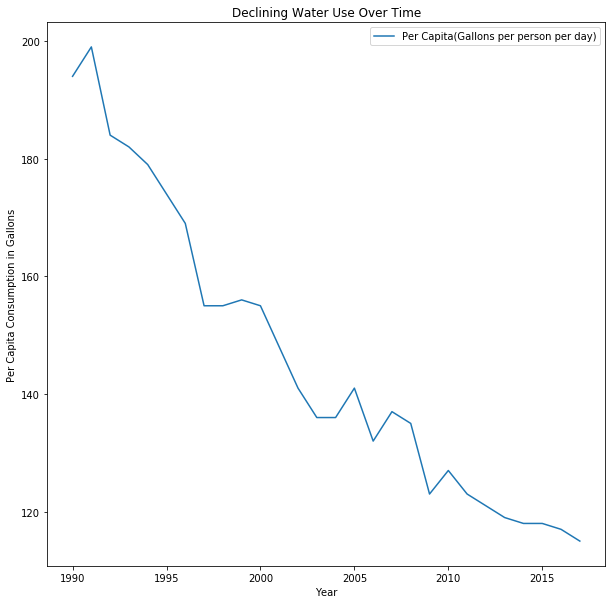

In [37]:
post_1990_df = water_df[['Per Capita(Gallons per person per day)', 'Year']].astype(int)

post_1990_df = post_1990_df[post_1990_df.Year > 1989].sort_values('Year')

display(post_1990_df)

ax = post_1990_df.plot(x='Year', y='Per Capita(Gallons per person per day)',
                      figsize=(10,10), title='Declining Water Use Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Per Capita Consumption in Gallons')
plt.show